<img src="logo_UTN.svg" align="right" width="150" /> 

## Teoría de Circuitos II

### Trabajo Práctico de Laboratorio 2

#### Por Grupo 2


# Consigna

![Consigna](Consigna.png "Consigna")

# Desarrollo

Para el diseño del filtro, se utilizó la herramienta FDATool a partir de su interfaz para obtener los coeficientes del filtro FIR e IIR, indicando los parámetros establecidos por la consigna.

## Filtro FIR

![1](Desarrollo/ParametrosFIR.png "1")

![1](Desarrollo/FIR.png "1")

![2](Desarrollo/CoeficientesFIR1.png "2")

![2](Desarrollo/CoeficientesFIR2.png "2")

## Filtro IIR

![1](Desarrollo/ParametrosIIR.png "1")

![1](Desarrollo/IIR.png "1")

# Simulación

In [33]:
# Módulos para Jupyter

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (25,25)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

#fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
#plt.rcParams.update({'font.family':fig_font_family})

# módulo de SciPy
from scipy import signal as sig

# un módulo adaptado a mis necesidades
from splane import analyze_sys, pretty_print_bicuad_omegayq, plot_plantilla

In [11]:
def group_delay(ww, phase):
    
    groupDelay = -np.diff(phase)/np.diff(ww)
    
    return(np.append(groupDelay, groupDelay[-1]))

Realizamos la simulación con los coeficientes obtenidos para posteriormente verificar y comparar con la medición.

## Filtro FIR

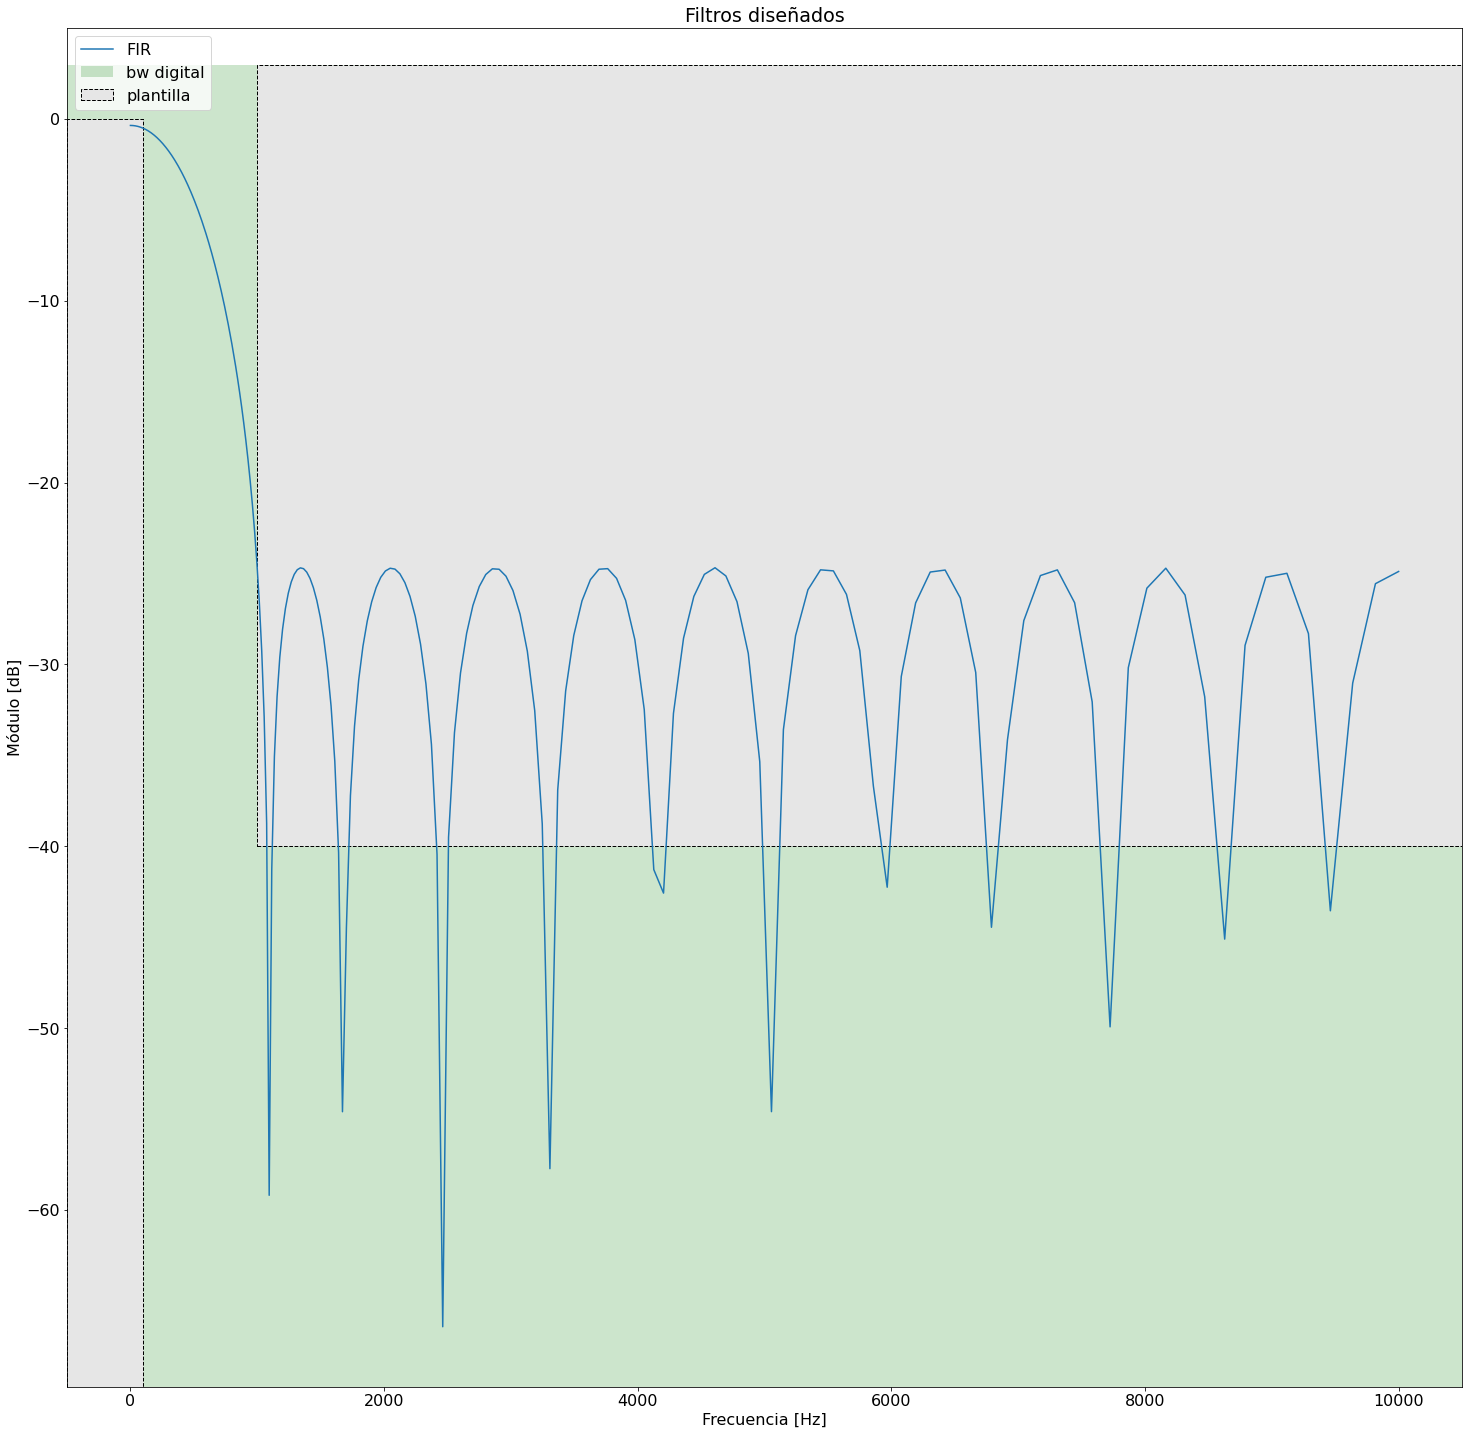

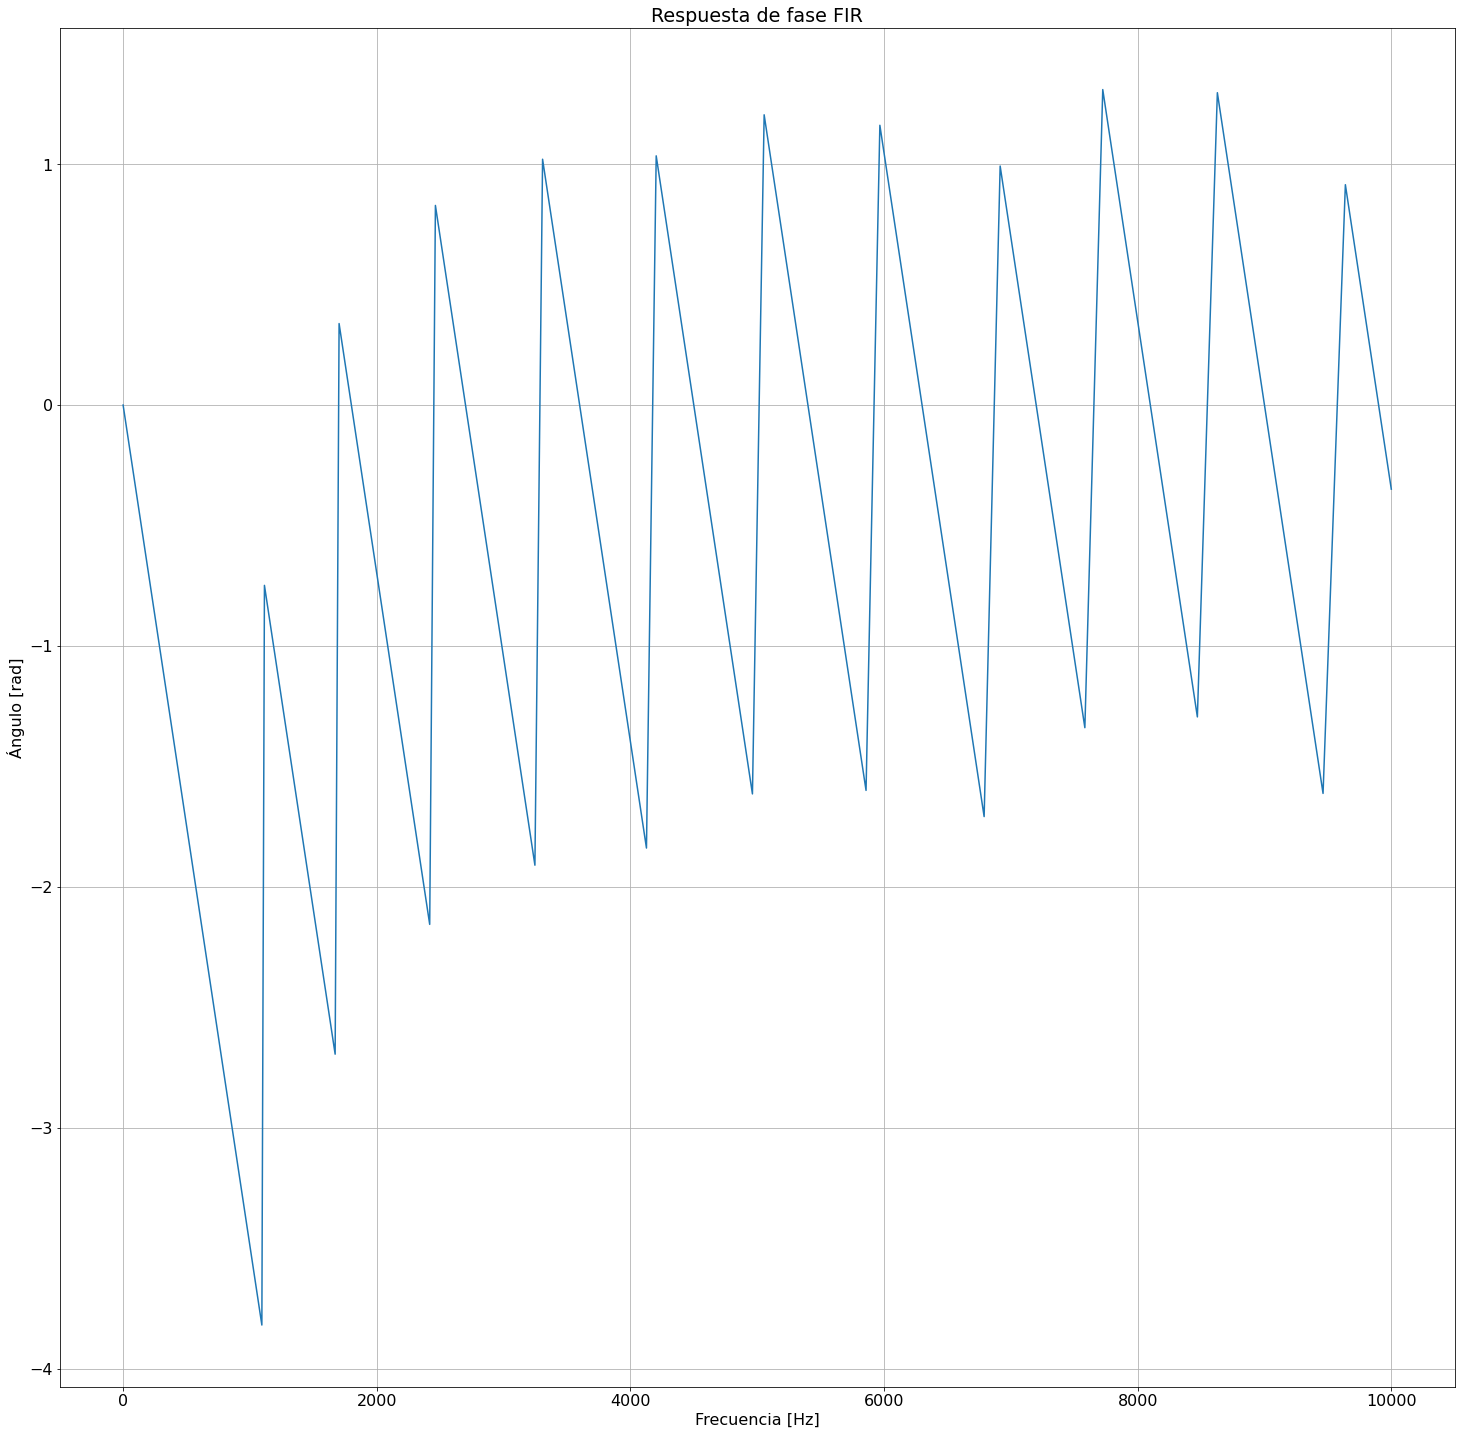

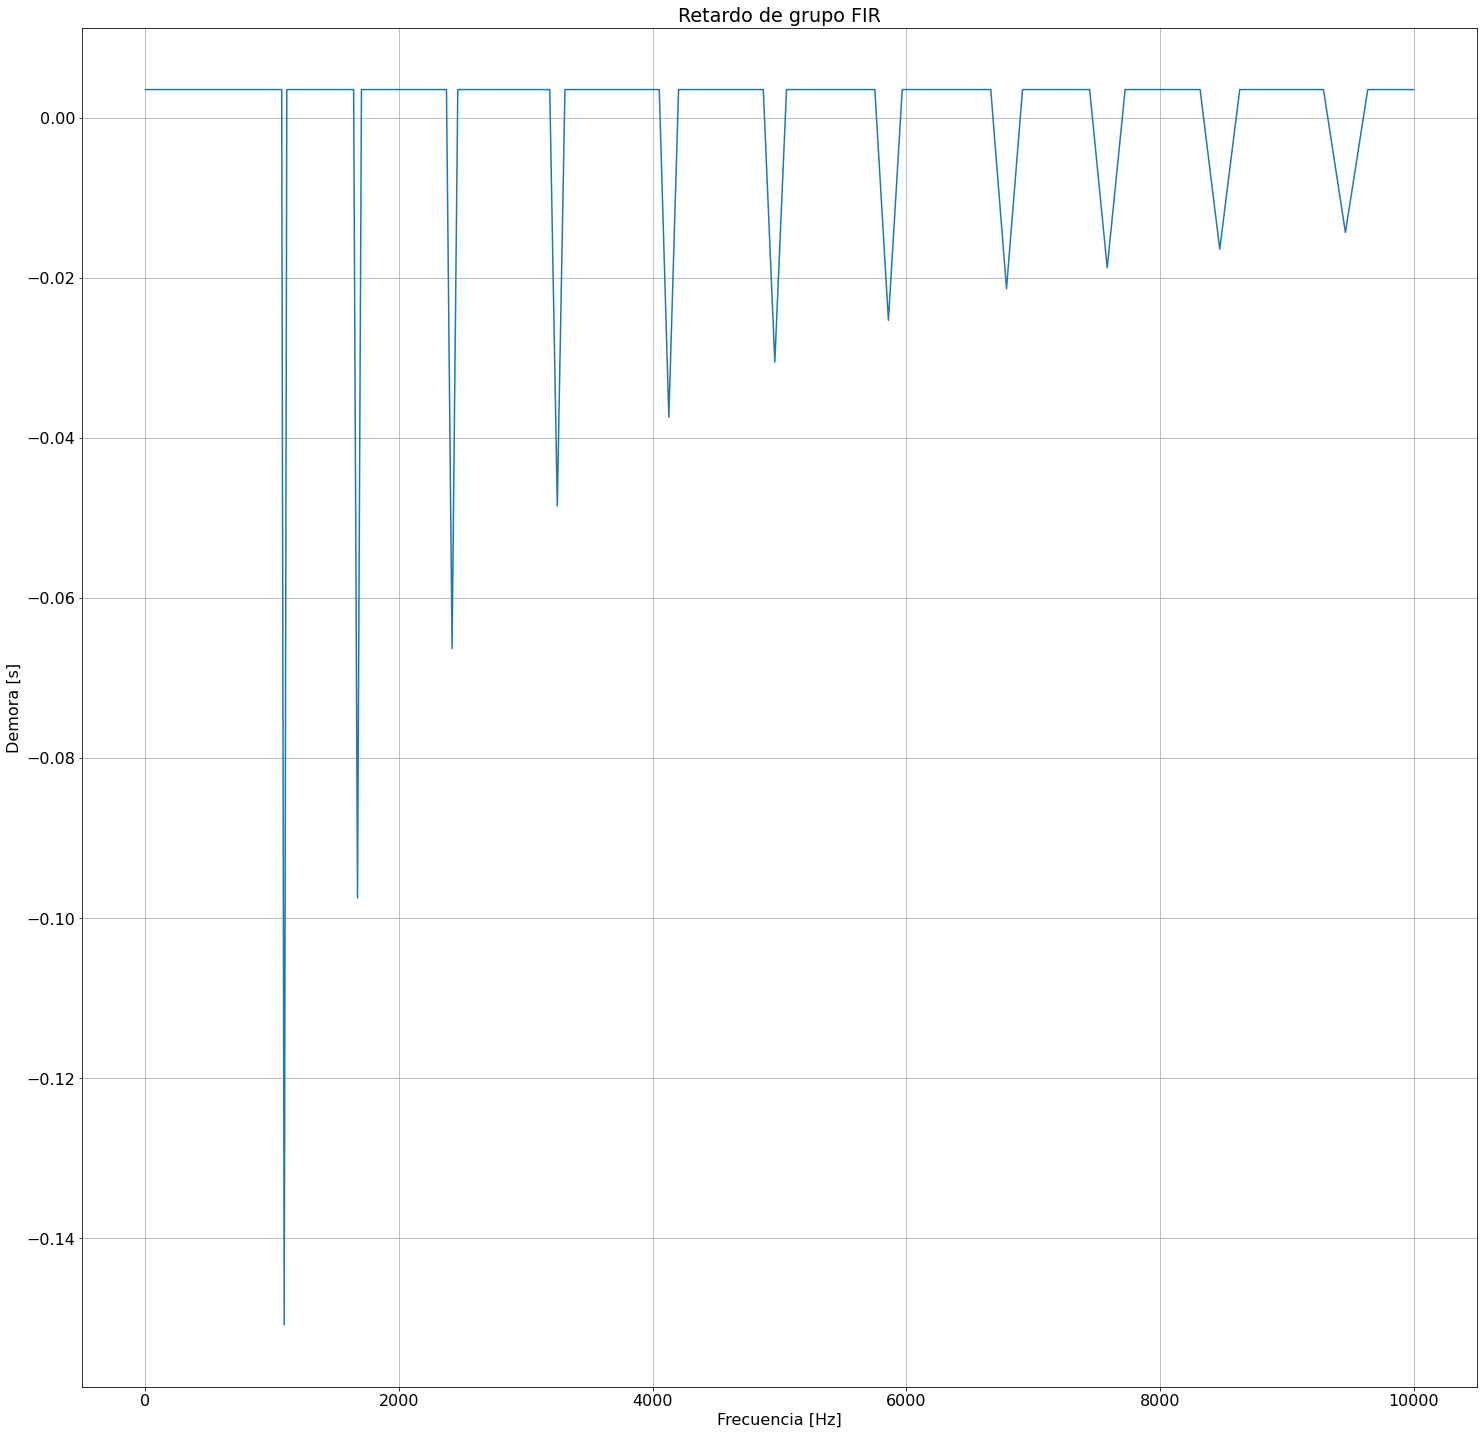

In [37]:
# Plantilla
f_pass = 1e2
f_stop = 1e3
at_pass = 0
at_stop = 40
fs = 44100
f_nyq = fs/2

# Coeficientes
num_fir = np.array([0.032969554415319055,0.008194735170083456,0.009142695618381998,0.010110160413435907,0.011107365406038624,0.012121225038988475,0.013165788635471975,0.014206385146474234,0.015245111862260362,0.016253612448441895,0.017238901077201517,0.018199291389390887,0.019176117803160024,0.020063277512612804,0.020878199075565818,0.021711207985707758,0.0224195503523805,0.023097015057376012,0.02368749228749393,0.024221822046805067,0.024661197023771366,0.025030543683842606,0.02529747633205001,0.02547178460341764,0.025575479685892598,0.025575479685892598,0.02547178460341764,0.02529747633205001,0.025030543683842606,0.024661197023771366,0.024221822046805067,0.02368749228749393,0.023097015057376012,0.0224195503523805,0.021711207985707758,0.020878199075565818,0.020063277512612804,0.019176117803160024,0.018199291389390887,0.017238901077201517,0.016253612448441895,0.015245111862260362,0.014206385146474234,0.013165788635471975,0.012121225038988475,0.011107365406038624,0.010110160413435907,0.009142695618381998,0.008194735170083456,0.032969554415319055])
den_fir = 1

w = np.logspace(-4, 4, 1000) / f_nyq * np.pi

_, h = sig.freqz(num_fir, den_fir, w)

w = w / np.pi * f_nyq

# Modulo
#plt.axis([0, 100, -60, 5 ]);
plt.title('Filtros diseñados')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.plot(w, 20 * np.log10(np.abs(h)), label='FIR')
plt.legend('FIR')
plot_plantilla(filter_type = 'lowpass', fpass = f_pass, ripple = at_pass , fstop = f_stop, attenuation = at_stop, fs = fs)

# Fase
plt.figure()
plt.title('Respuesta de fase FIR')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Ángulo [rad]')
fase_fir = np.unwrap(np.angle(h))
#fase_fir = np.angle(h)
plt.plot(w, fase_fir)
plt.grid(which='both', axis='both')
#plt.xlim(0, 100)
#plt.axis([0, 100, -25, 5 ]);

# Retardo
gd_iir = group_delay(w, fase_fir)
plt.figure()
plt.title('Retardo de grupo FIR')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Demora [s]')
plt.plot(w, gd_iir)
plt.grid(which='both', axis='both')
#plt.xlim(0, 100)
#plt.axis([0, 100, -2, 7 ]);

## Filtro IIR

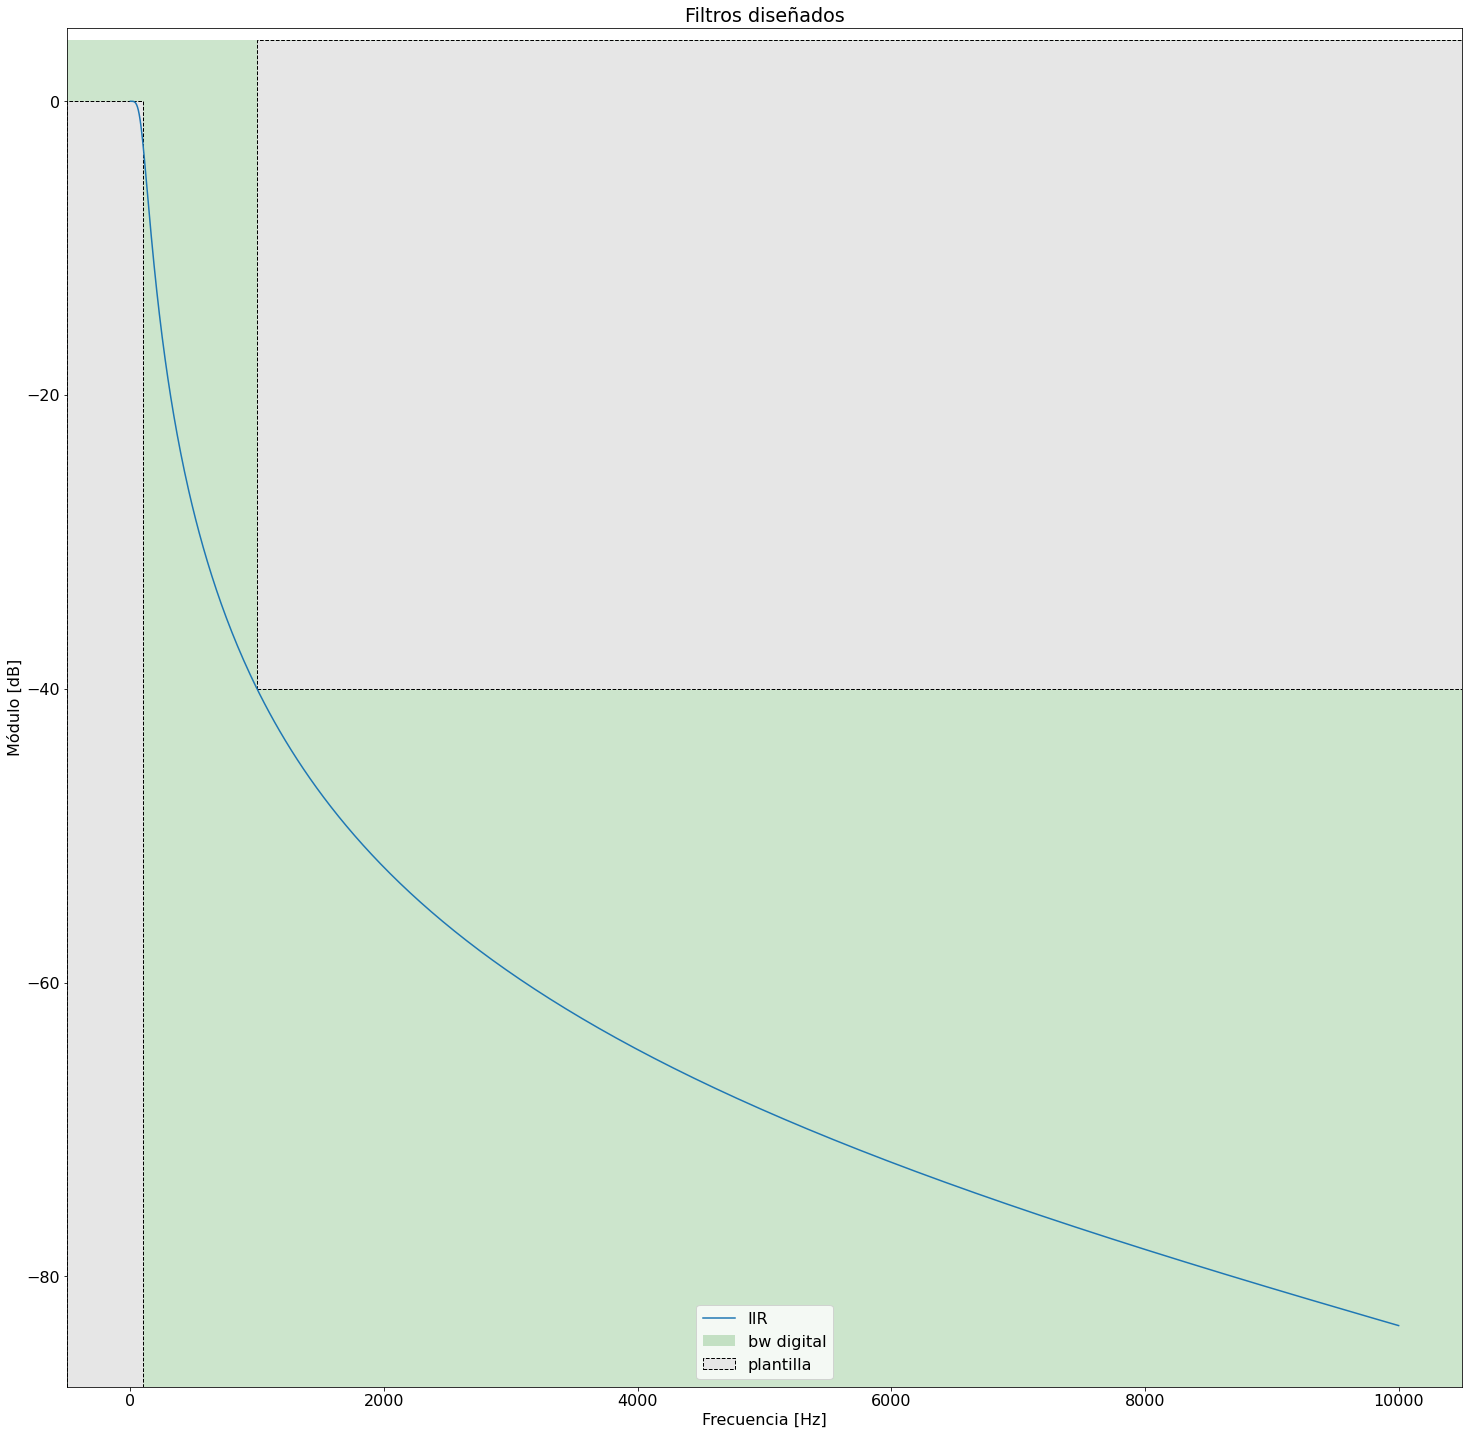

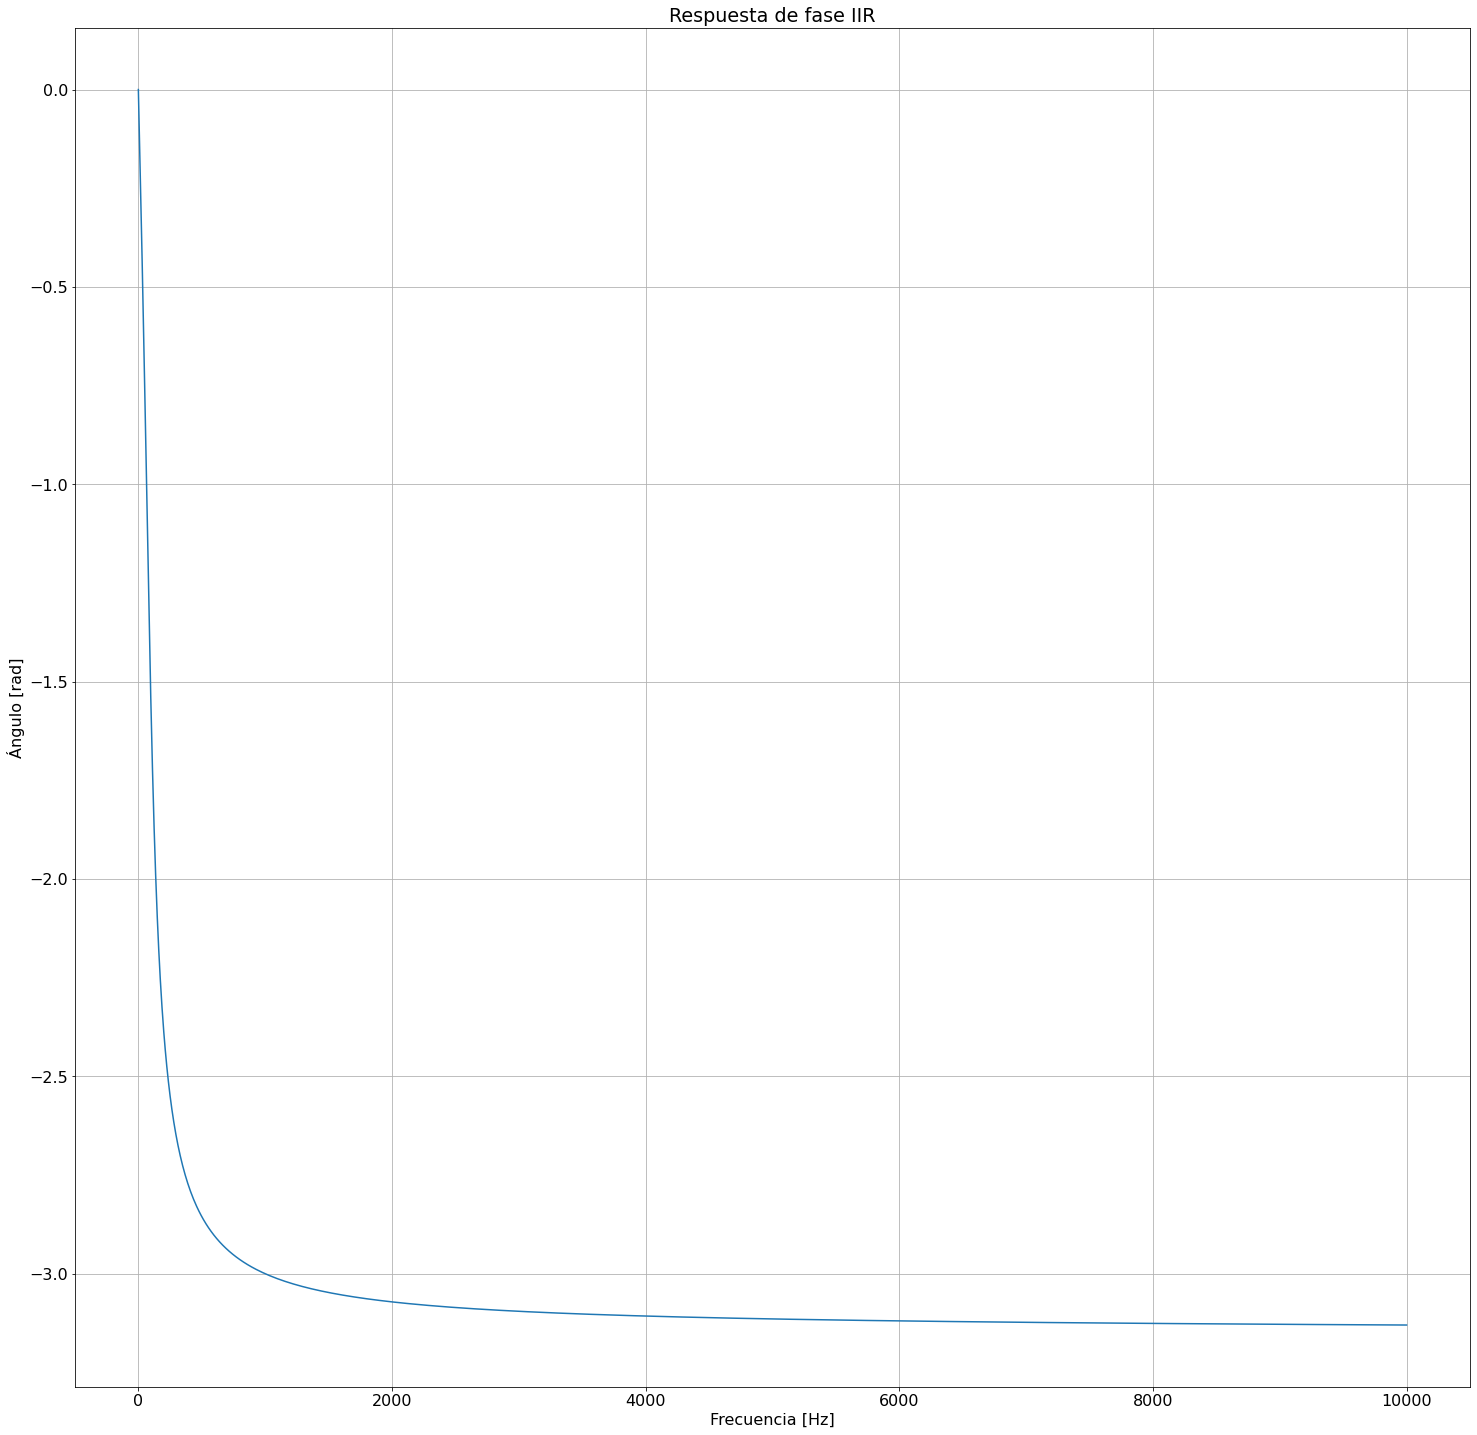

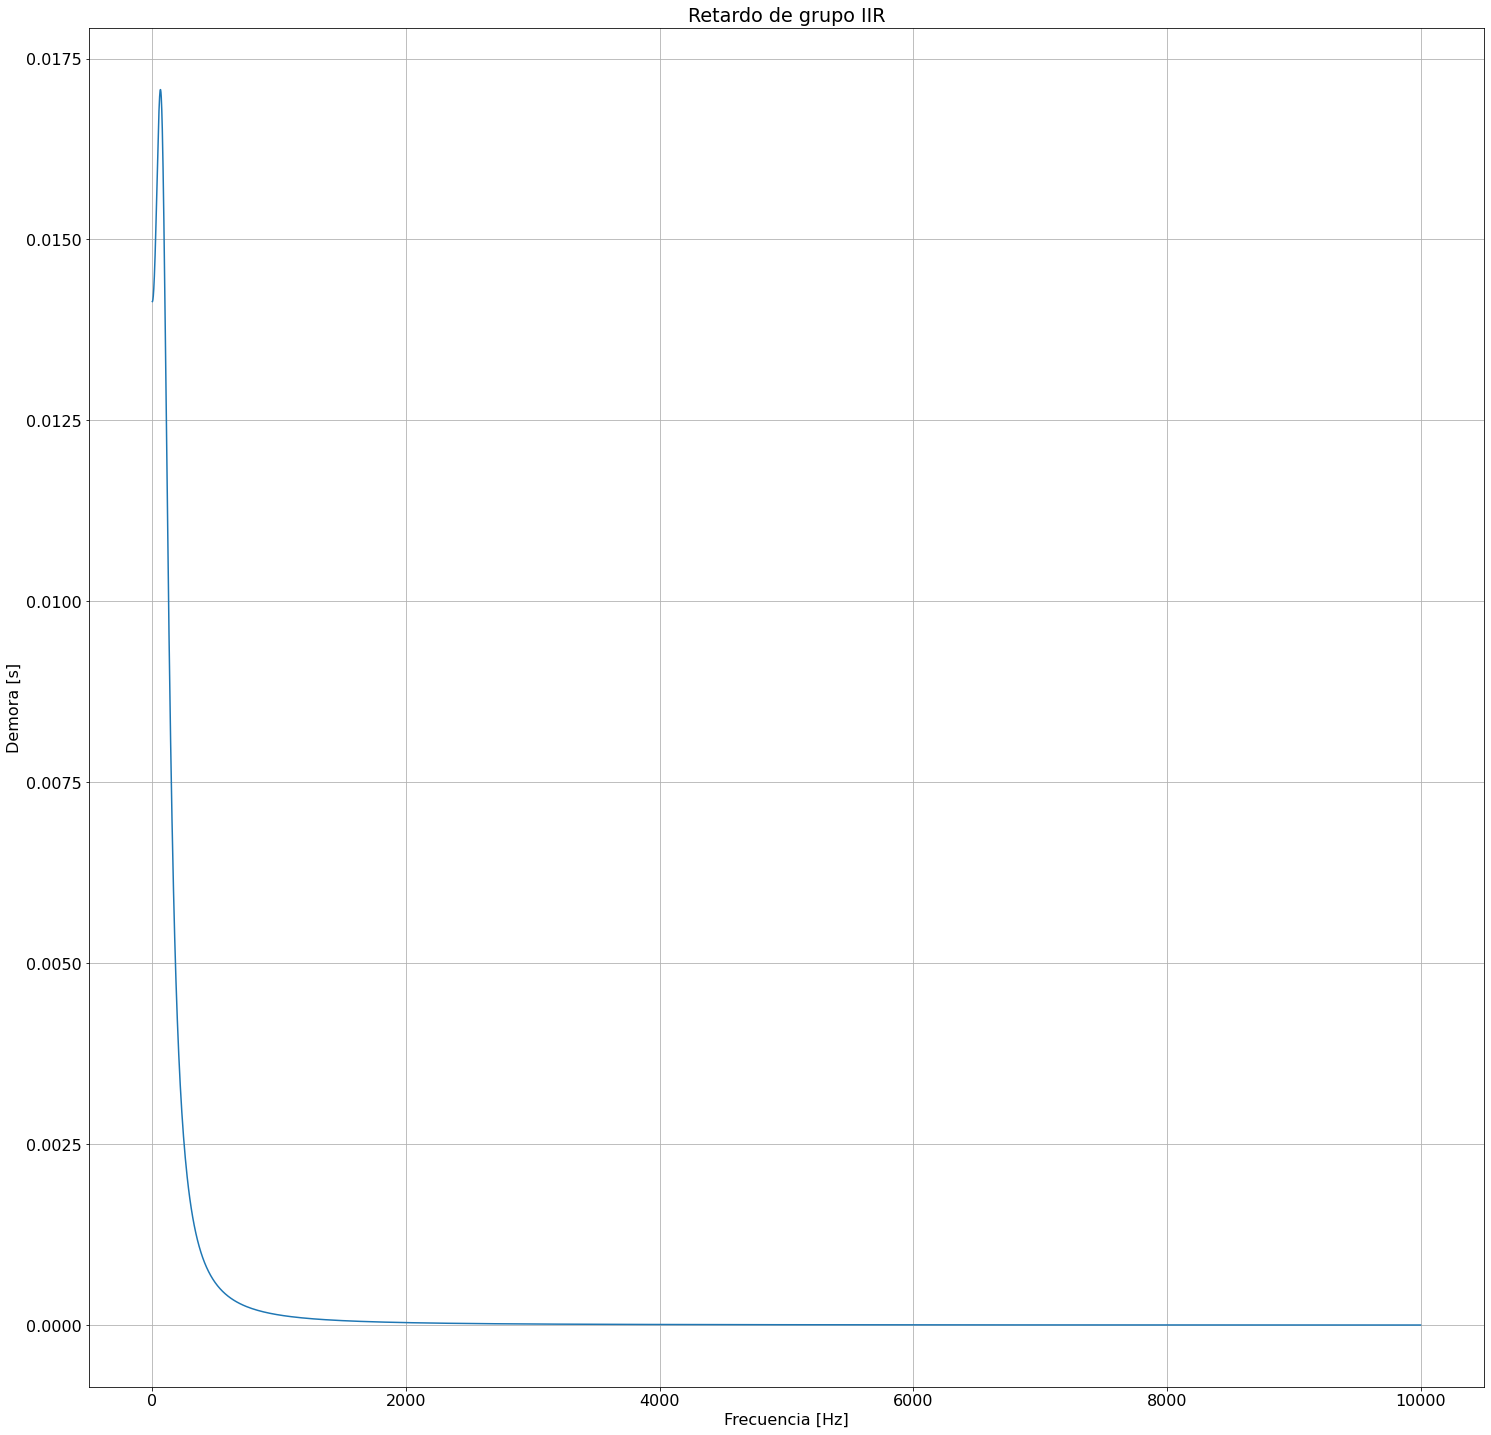

In [36]:
# Plantilla
f_pass = 1e2
f_stop = 1e3
at_pass = 0
at_stop = 40
fs = 44100
f_nyq = fs/2

# Coeficientes
num_iir = np.array([5.024142299431054e-05,0.00010048284598862108,5.024142299431054e-05])
den_iir = np.array([1.0,-1.9798515425143586,0.9800525082063358])

w = np.logspace(-4, 4, 1000) / f_nyq * np.pi

_, h = sig.freqz(num_iir, den_iir, w)

w = w / np.pi * f_nyq

# Modulo
#plt.axis([0, 100, -60, 5 ]);
plt.title('Filtros diseñados')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.plot(w, 20 * np.log10(np.abs(h)), label='IIR')
plt.legend('IIR')
plot_plantilla(filter_type = 'lowpass', fpass = f_pass, ripple = at_pass , fstop = f_stop, attenuation = at_stop, fs = fs)

# Fase
plt.figure()
plt.title('Respuesta de fase IIR')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Ángulo [rad]')
#fase_iir = np.unwrap(np.angle(h))
fase_iir = np.angle(h)
plt.plot(w, fase_iir)
plt.grid(which='both', axis='both')
#plt.xlim(0, 100)
#plt.axis([0, 100, -25, 5 ]);

# Retardo
gd_iir = group_delay(w, fase_iir)
plt.figure()
plt.title('Retardo de grupo IIR')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Demora [s]')
plt.plot(w, gd_iir)
plt.grid(which='both', axis='both')
#plt.xlim(0, 100)
#plt.axis([0, 100, -2, 7 ]);

# SPICE

Se diseñó también un filtro antialias para colocar en la entrada del ADC y en la salida del DAC, con una frecuencia de corte de 5KHz, para así asegurarnos de tener una buena atenuación en frecuencias cercanas a Nyquist (22050Hz).

![Circuito](Desarrollo/AntiAlias_Circuito.png "Circuito")

![1](Desarrollo/AntiAlias_Sim.png "1")

# Mediciones

A continuación se grafican las mediciones obtenidas con los filtros con el osciloscopio.

## FIR

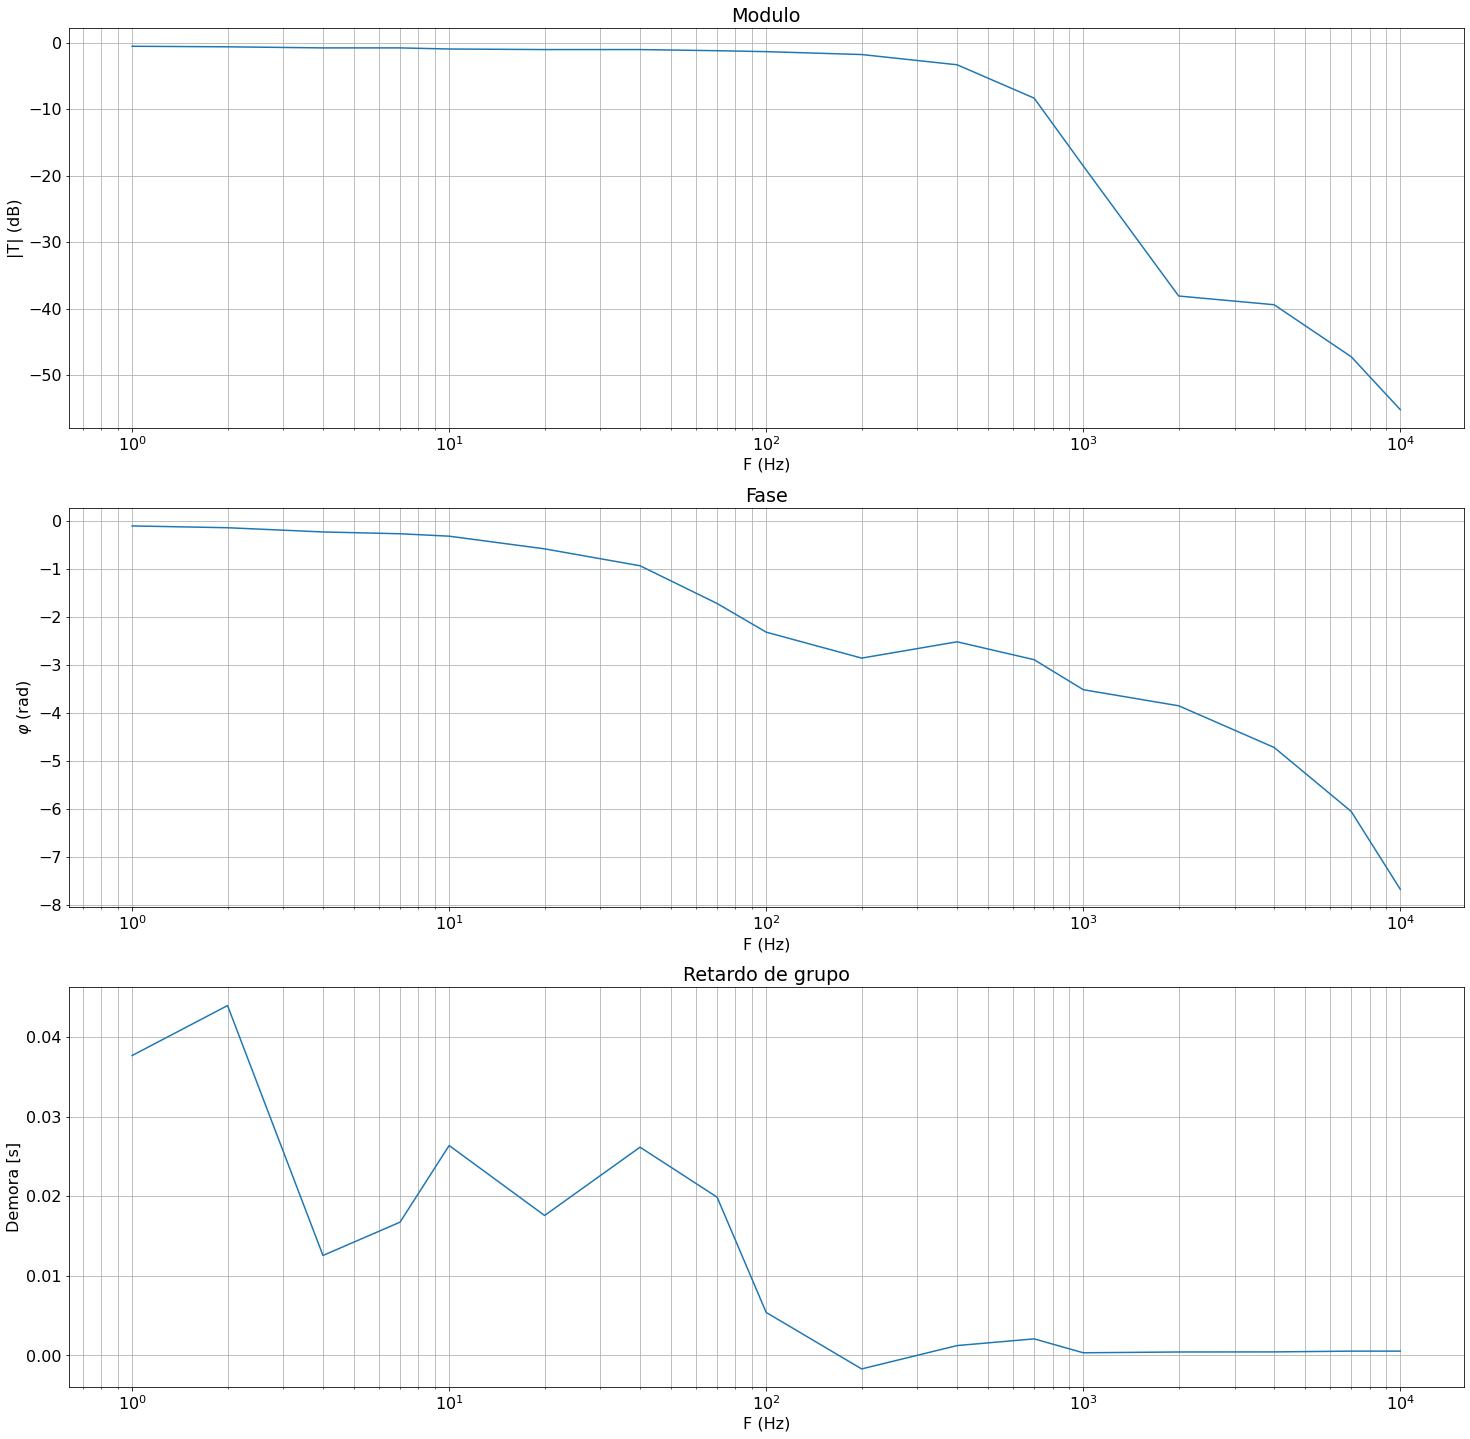

In [44]:
frec = [1,2,4,7,10,20,40,70,100,200,400,700,1000,2000,4000,7000,10000]

modulo = [ 0.939130435,
0.930434783,
0.913043478,
0.913043478,
0.895652174,
0.886956522,
0.886956522,
0.869565217,
0.855652174,
0.813913043,
0.68173913,
0.382608696,
0.11826087,
0.012434783,
0.010695652,
0.004347826,
0.00173913]

desfasaje = [-0.100530965,
-0.138230077,
-0.226194671,
-0.263893783,
-0.314159265,
-0.578053048,
-0.929911425,
-1.715309589,
-2.312212193,
-2.852566129,
-2.513274123,
-2.885238693,
-3.510206192,
-3.845309408,
-4.71238898,
-6.044424266,
-7.665486075]


fig, (ax1, ax2, ax3) = plt.subplots(3)

ax1.plot(frec, 20*np.log10(modulo))
ax1.set_xscale("log")
ax1.set_title('Modulo')
ax1.set_xlabel('F (Hz)')
ax1.set_ylabel('|T| (dB)')
ax1.grid(which='both', axis='both')

ax2.plot(frec, desfasaje)
ax2.set_xscale("log")
ax2.set_title('Fase')
ax2.set_xlabel('F (Hz)')
ax2.set_ylabel(r'$\varphi$' + ' (rad)')
ax2.grid(which='both', axis='both')

# Retardo
gd_fir_med = group_delay(frec, desfasaje)
ax3.plot(frec, gd_fir_med)
ax3.set_xscale("log")
ax3.set_title('Retardo de grupo')
ax3.set_xlabel('F (Hz)')
ax3.set_ylabel('Demora [s]')
ax3.grid(which='both', axis='both')


Se puede observar que el filtro obtiene la atenuación deseada recién en 2KHz, esto podría solucionarse aumentando el orden del filtro.

## IIR

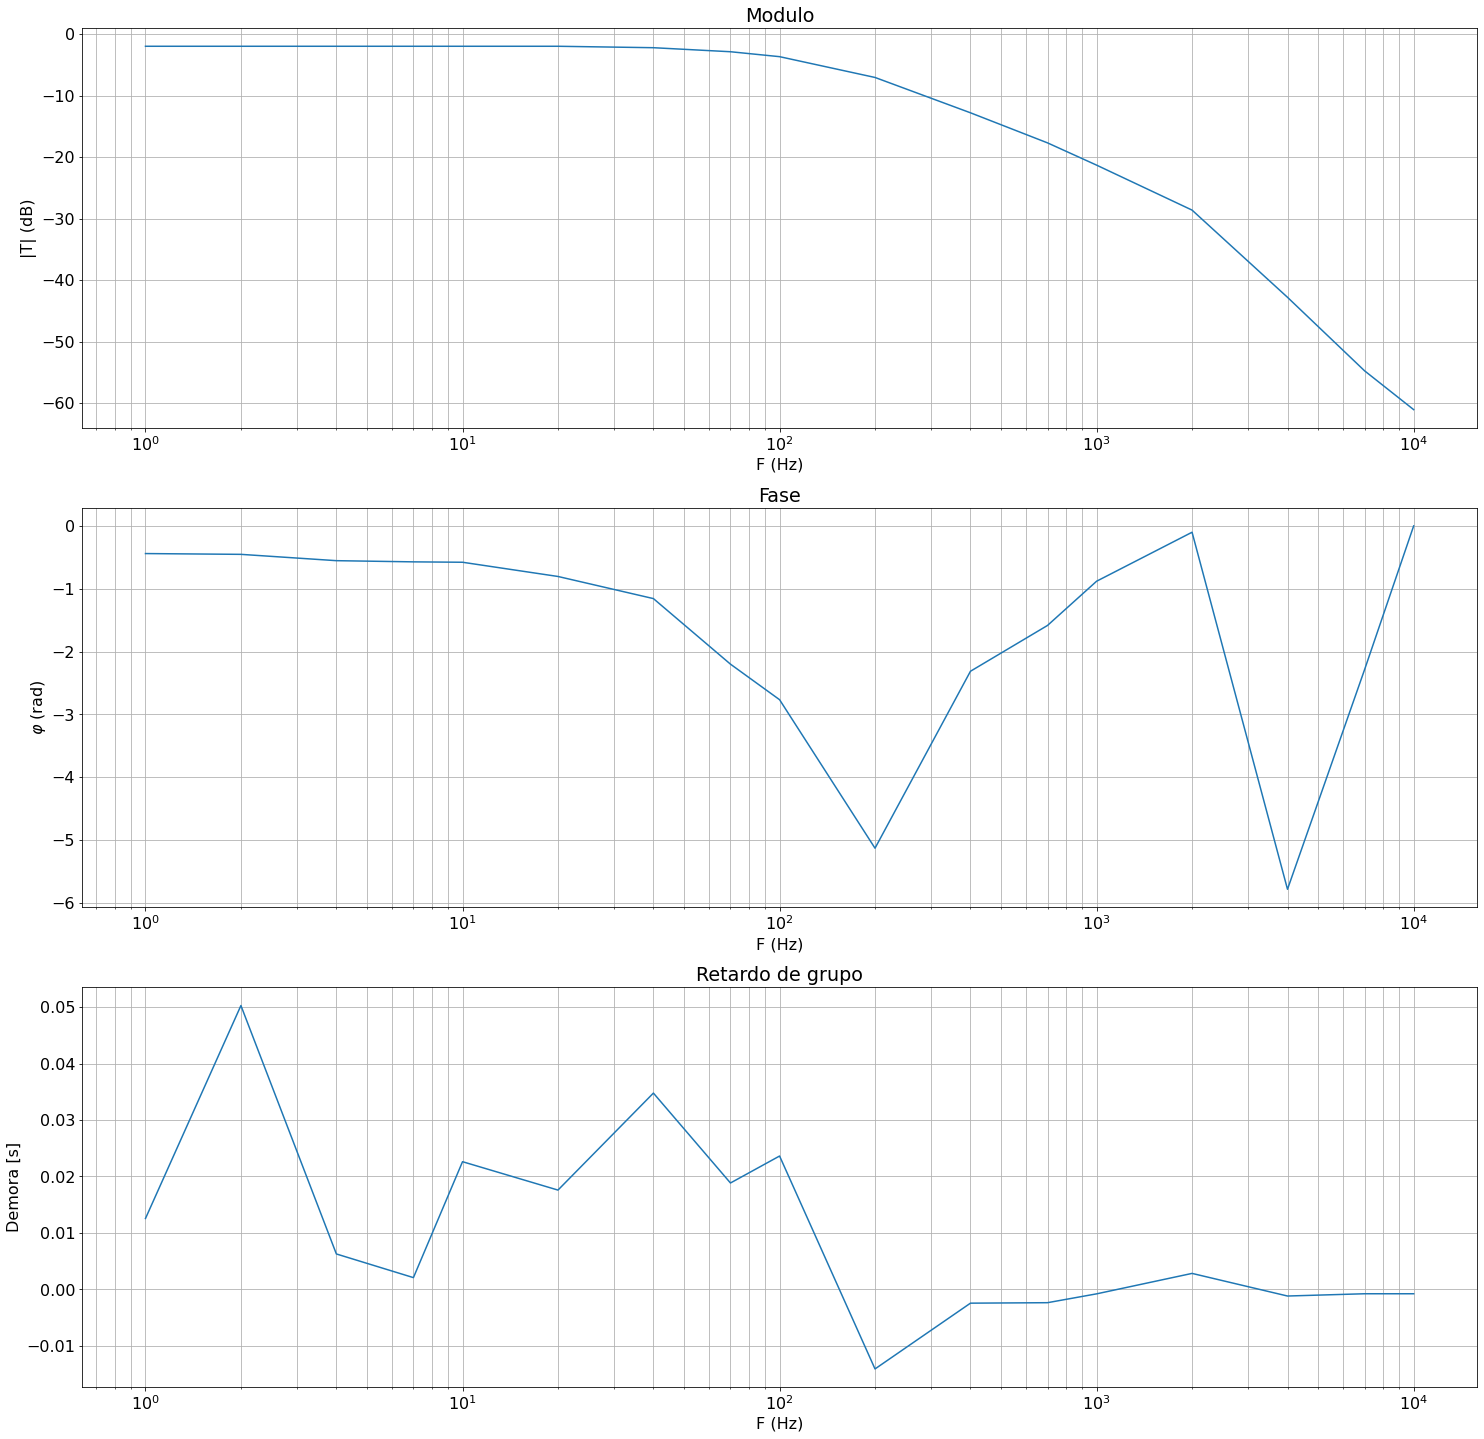

In [45]:
frec = [1,2,4,7,10,20,40,70,100,200,400,700,1000,2000,4000,7000,10000]

modulo = [ 0.8,
0.8,
0.8,
0.8,
0.8,
0.8,
0.778761062,
0.722123894,
0.65840708,
0.446017699,
0.230088496,
0.130973451,
0.086283186,
0.037168142,
0.007256637,
0.001831858,
0.000884956
]

desfasaje = [-0.439822972,
-0.452389342,
-0.552920307,
-0.571769863,
-0.578053048,
-0.804247719,
-1.156106097,
-2.199114858,
-2.764601535,
-5.127079211,
-2.312212193,
-1.583362697,
-0.879645943,
-0.100530965,
-5.780530483,
-2.287079452,
0]

fig, (ax1, ax2, ax3) = plt.subplots(3)

ax1.plot(frec, 20*np.log10(modulo))
ax1.set_xscale("log")
ax1.set_title('Modulo')
ax1.set_xlabel('F (Hz)')
ax1.set_ylabel('|T| (dB)')
ax1.grid(which='both', axis='both')

ax2.plot(frec, desfasaje)
ax2.set_xscale("log")
ax2.set_title('Fase')
ax2.set_xlabel('F (Hz)')
ax2.set_ylabel(r'$\varphi$' + ' (rad)')
ax2.grid(which='both', axis='both')

# Retardo
gd_iir_med = group_delay(frec, desfasaje)
ax3.plot(frec, gd_iir_med)
ax3.set_xscale("log")
ax3.set_title('Retardo de grupo')
ax3.set_xlabel('F (Hz)')
ax3.set_ylabel('Demora [s]')
ax3.grid(which='both', axis='both')


Se puede observar que el filtro obtiene la atenuación deseada recién en 4KHz, esto podría solucionarse aumentando el orden del filtro. Respecto a la fase

## Mediciones hechas con analizador

## Antialias

Se midió también la respuesta del filtro antialias para saber como se comporta.

![Modulo](Mediciones/Modulo_Aliasing.jpeg "Modulo")

## FIR

![Modulo](Mediciones/Modulo_FIR.jpeg "Modulo")

## IIR

![Modulo](Mediciones/Modulo_IIR.jpeg "Modulo")

## Conclusiones

Las respuestas obtenidas en el analizador y las mediciones son coincidentes.